# 1. RecSys with GNN
## 1.1 Graph Neural Network

**Graph**

꼭짓점(Node)들과 그 노드들을 잇는 변(Edge)들을 모아 구성한 자료 구조

일반적으로 그래프는 G = (V, E)로 정의한다.
- ex) G = ({A,B,C,D},{{A,B},{A,C},{A,D},{C,D}})
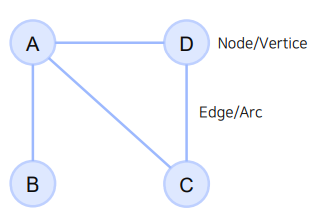

**Graph를 사용하는 이유**

1. 관계, 상호작용과 같은 추상적인 개념을 다루기에 적합.
- 복잡한 문제를 더 간단한 표현으로 단순화하기도 하고 다른 관점으로 표현 가능하다.
- 소셜 네트워크, 바이러스 확산, 유저-아이템 소비 관계 등을 모델링 할 수 있다.
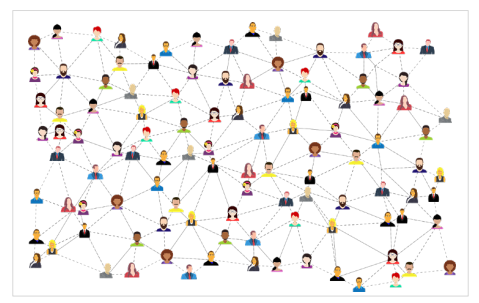
<br></br>

2. Non-Euclidean Space의 표현 및 학습이 가능하다.
- 우리가 흔히 다루는 이미지, 텍스트, 정형 데이터는 격자 형태로 표현 가능하다(Euclidean Space).
- 그러나 SNS 데이터, 분자(molecule) 데이터 등은 non-Euclidean space이다.
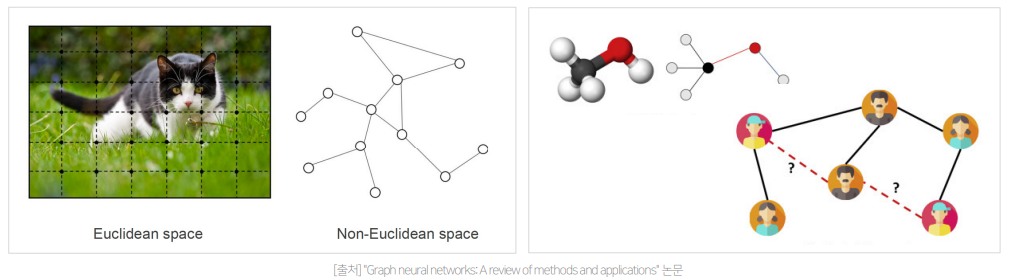

**그래프 신경망(Graph Neural Network, GNN)**
<br></br>

그래프 데이터에 적용 가능한 신경망
- 목적 : 이웃 노드들 간의 정보를 이용해서 특정 노드를 잘 표현할 수 있는 특징(벡터)을 잘 찾아내는 것
- 방법 : 그래프 및 피쳐 데이터를 인접 행렬로 변환하여 MLP에 사용하는 방법 등이 있다.(Naive apporach)
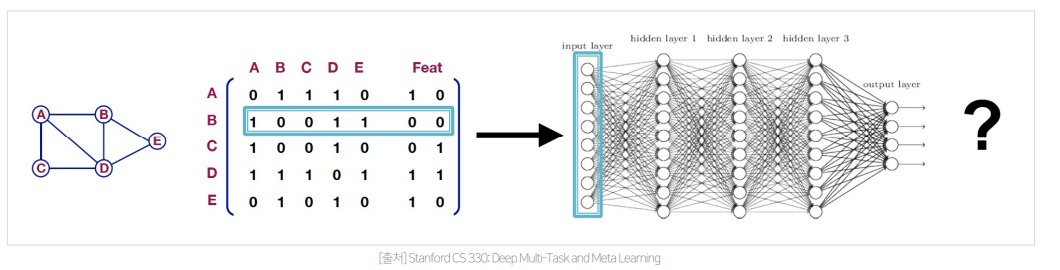

**Graph Convolution Network(GCN)**

Naive Approach의 한계
- 노드가 많아질수록 연산량이 기하급수적으로 많아지며, 노드의 순서가 바뀌면 의미가 달라질 수 있다.

-> local connectivity, shared weights, multi-layer를 이용하여 convolution 효과를 만들면, 연산량을 줄이면서 깊은 네트워크로 간접적인 고나계 특징까지 추출할 수 있다.
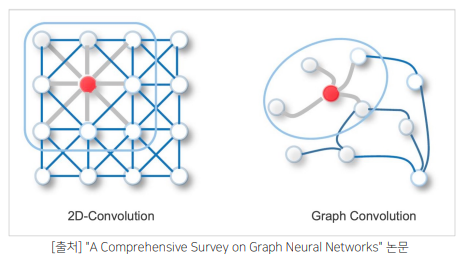

## 1.2 Neural Graph Collaborative Filtering
유저-아이템 상호작용(Collaborative Signal)을 GNN으로 임베딩 과정에서 인코딩하는 접근법을 제시한 논문이다.

**Neural Graph Collaborative Filtering(NGCF)의 등장 배경**
<br></br>

학습가능한 CF 모델의 두 가지 키 포인트는 아래와 같다.
- 1) 유저와 아이템의 임베딩
- 2) 상호작용 모델링
<br></br>

신경망을 적용한 기존 CF 모델들은 유저-아이템의 상호작용을 임베딩 단계에서 접근하지 못 한다.
- latent factor 추출을 interaction function에만 의존하므로 sub-optimal한 임베딩을 사용한다.
- => 부정확한 추천의 원인이 될 수 있다.
- ex) Neural Collaborative Filtering family

**NGCF 기본 아이디어**

Collaborative Signal
- 유저-아이템의 상호작용이 임베딩 단에서부터 학습될 수 있도록 접근한다.
- 유저, 아이템 개수가 많아질수록 모든 상호작용을 표현하기엔 한계가 존재한다.
- => GNN을 통해 High-order Connectivity를 임베딩한다(경로가 1보다 큰 연결을 의미).
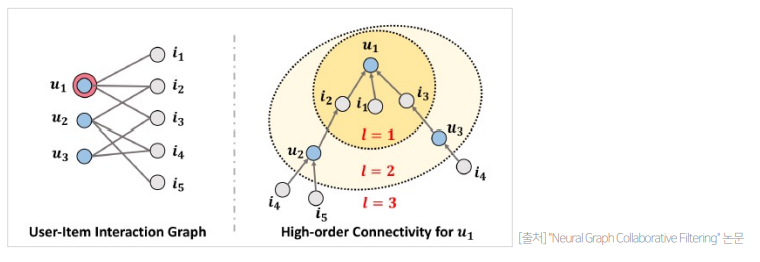

**NGCF 전체 구조**

1. 임베딩 레이어(Embedding Layer)
- 유저-아이템의 초기 임베딩 제공
<br></br>

2. 임베딩 전파 레이어(Embedding Propagation Layer)
- high-order connectivity 학습
<br></br>

3. 유저-아이템 선호도 예측 레이어(Prediction Layer)
- 서로 다른 전파 레이어에서 refine된 임베딩 concat
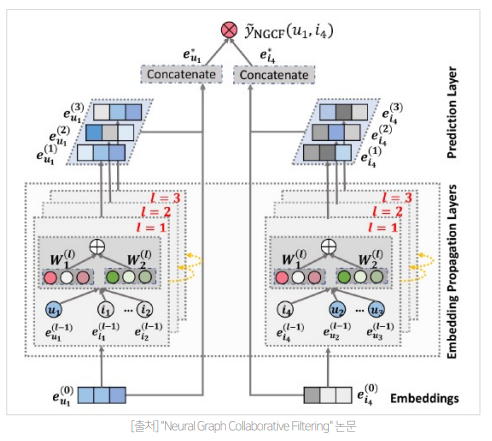

**임베딩 레이어**
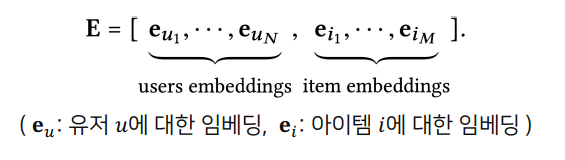
vs. Collaborative Filtering
- 기존의 MF, Neural CF 모델에서는 임베딩이 곧바로 interaction function에 입력된다.
- **NGCF**에서는 이 임베딩을 GNN 상에서 전파시켜 'refine'한다.
- => Collaborative Signal을 명시적으로 임베딩 레이어에서 주입하기 위한 과정이다.

**임베딩 전파 레이어 - First-order Propagation**

유저-아이템의 collaborative signal을 담을 'message'를 구성하고 결합하는 단계
- Message Construction : 유저-아이템 간 affinity를 고려할 수 있도록 메시지를 구성한다(weight sharing).
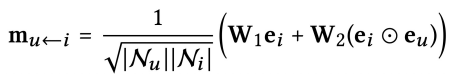
<br></br>

- Message Aggregation : u의 이웃 노드로부터 전파된 message들을 결합하면 1-hop 전파를 통한 임베딩이 완료된다.
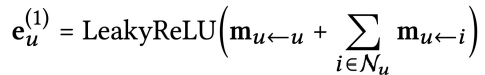

($W_1, W_2$ : weight matrix / ⊙ : element-wise production / $N_u, N_i$ : 유저, 아이템의 이웃한 유저, 아이템 집합)

**임베딩 전파 레이어 - Higher-order Propagation**

$l$개의 임베딩 전파 레이어를 쌓으면, 유저 노드는 $l$-차 이웃으로부터 전파된 메시지 이용이 가능하다.
- $l$단계에서 유저 $u$의 임베딩은($l$-1)단계의 임베딩을 통해 재귀적으로 형성한다(Higher order propagation).
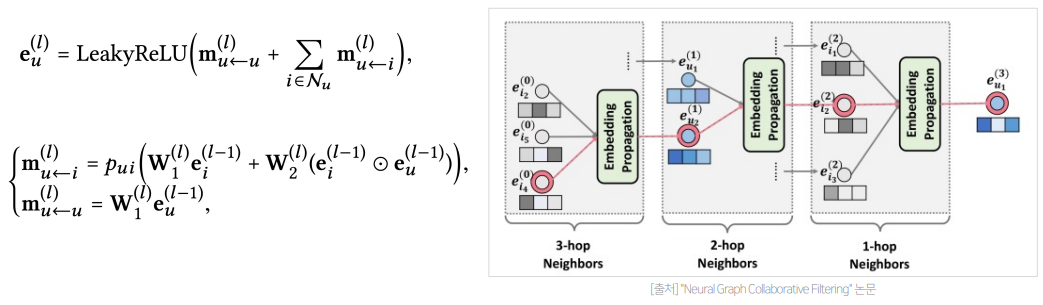

**선호도 예측 레이어**

L차 까지의 임베딩 벡터를 concatenate하여 최종 임베딩 벡터를 계산한 후, 유저-아이템 벡터를 내적하여 최종 선호도 예측값을 계산한다.
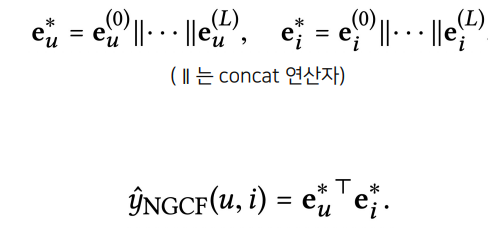

**결과 및 요약**

임베딩 전파 레이어가 많아질수록 모델의 추천 성능 향상
- 다만, 레이어가 너무 많이 쌓이면 overfitting 발생될 수 있다.
- 실험 결과, 대략 L = 3 ~ 4일 때 가장 좋은 성능을 보인다.
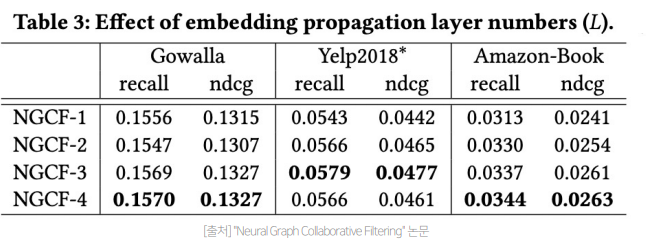

MF보다 더 빠르게 수렴하고 recall도 높다.
- Model Capacity가 크고 임베딩 전파를 통해 representation power가 좋아졌기 때문이다.
<br></br>

MF와 비교하여 유저-아이템이 임베딩 공간에서 더 명확하게 구분된다(레이어가 많아질수록 명확해진다).
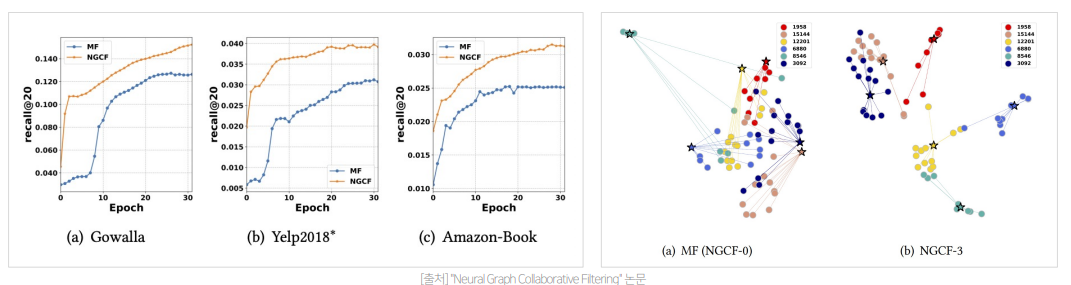

## 1.3 LightGCN
**LightGCN : Simplifying and Powering Graph Convolution Network for Recommendation**
- GCN의 가장 핵심적인 부분만 사용하여, 더 정확하고 가벼운 추천 모델을 제시한 논문이다.
<br></br>

**LightGCN 아이디어**

Light Graph Convolution
- 이웃 노드의 임베딩을 가중합 하는 것이 convolution의 전부, 학습 파라미터와 연산량이 감소했다.
<br></br>

Layer Combination
- 레이어가 깊어질수록 강도가 약해질 것이라는 아이디어를 적용해 모델을 단순화했다.

**LightGCN 모델 구조(vs. NGCF)**
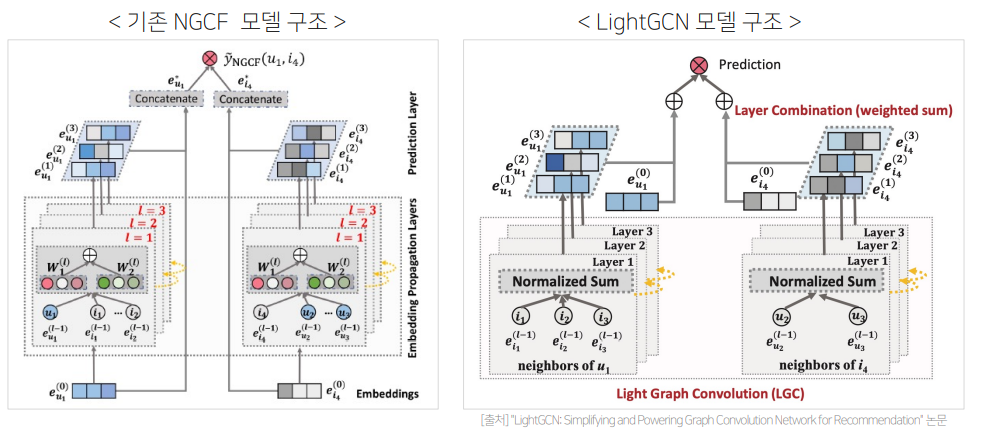

**LightGCN Propagation Rule(vs. NGCF)**

feature transformation이나 nonlinear activation을 제거하고 가중합으로 GCN을 적용.
- 연결된 노드만 사용하였기 때문에 self-connection이 없다.
- 학습 파라미터는 0번 째 임베딩 레이어에서만 존재한다.
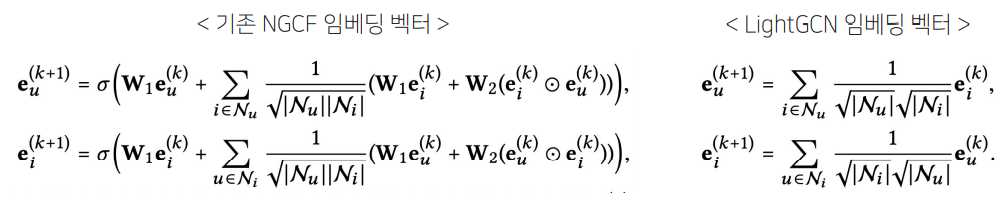

**LightGCN Model Prediction(vs.NGCF)**

최종 예측을 위해 각 레이어의 임베딩을 결합하는 방법도 NGCF와 다르다.
- k-층으로 된 레이어의 임베딩을 각각 $\alpha_k$배 하여 가중합으로 최종 임베딩 벡터를 계산한다.
- *$\alpha_k$는 k-층 임베딩 벡터의 가중치로, 하이퍼 파라미터 혹은 학습 파라미터 둘 다 가능하다.(논문에서는 $(k+1)^{-1}$사용)
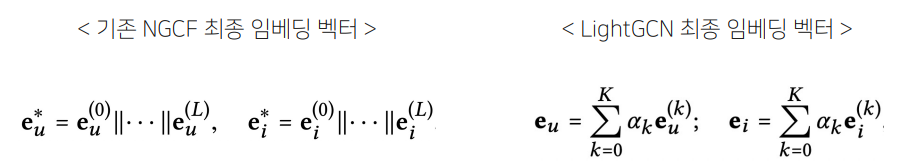

**결과 및 요약**

학습을 통한 손실 함수와 추천 성능 모두 NGCF보다 뛰어났다.
- training loss가 낮으면 추천 성능이 좋다는 건은 모델의 Generalization Power가 크다는 것이다.
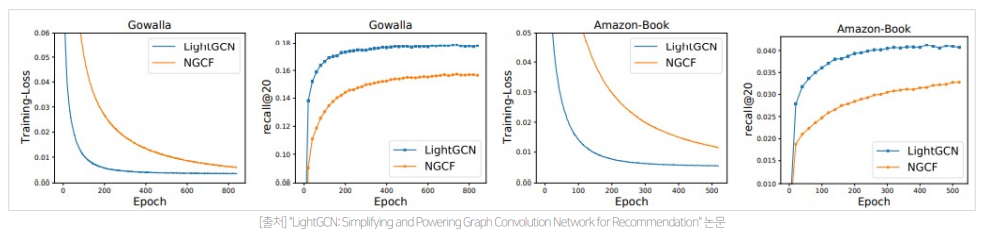

# 2. RecSys with RNN
## 2.1 RNN families
**순환 신경망(Recurrent Neural Network, RNN)**

시퀀스 데이터의 처리와 이해에 좋은 성능을 보이는 신경망 구조로 제안됐다.
- 현재의 상태(state)가 그 다음 상태(state)에 영향을 미치도록 루프 구조 고안됐다.
- => 시퀀스 데이터의 처리와 이해에 좋은 성능을 보이는 신경망 구조로써 제안됐다.
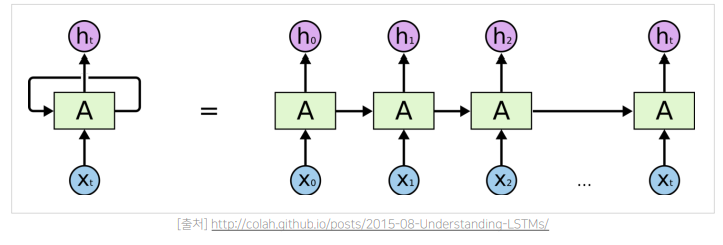

**Long-Short Term Memory(LSTM)**

시퀀스가 길어지는 경우 학습 능력이 현저하게 저하되는 RNN의 한계를 극복하기 위해 고안된 모델이다.
- 장기 의존성 해결을 위해 Cell state라는 구조를 고안했다.
- 모델 구성 : forget gate & input gate & output gate & cell state update
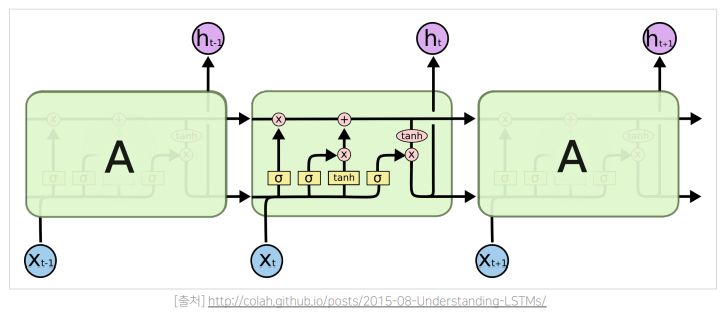

**Gated Recurrent Unit(GRU)**

LSTM의 변형 중 하나로, 출력 게이트가 따로 없어 파라미터와 연산량이 더 적은 모델이다.
- 모델 구성 : reset gate & update gate
- LSTM과 명확한 성능 차이가 없으면서 훨씬 가벼운 모델이다(각 task에 더 적합한 모델을 선택하면 된다).
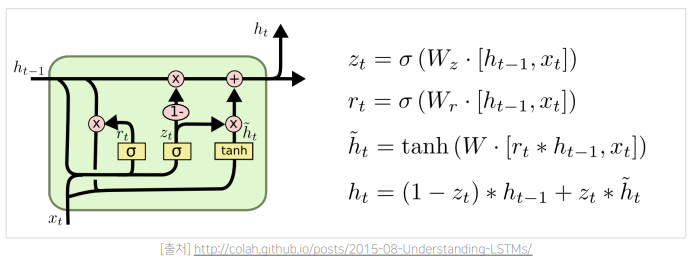

## 2.2 GRU4Rec
**RNN과 추천 시스템**

Session based Recommender System
- 고객의 선호는 고정된 것이 아니다. -> '지금' 고객이 좋아하는 것은 무엇일까?
<br></br>

Session : 유저가 서비스를 이용하는 동안의 행동을 기록한 데이터
- ex) 브라우저가 종료되기 전까지 쿠키 형태로 저장되는 데이터
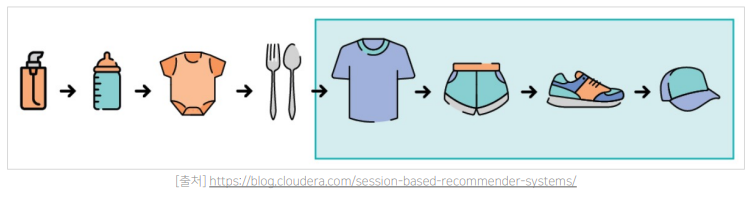

**Session-Based Recommendation with Recurrent Neural Networks**

: '지금' 고객이 원하는 상품을 추천하는 것을 목표로, 추천 시스템에 RNN을 적용한 논문이다.

**GRU4Rec 아이디어**

Session이라는 시퀀스를 GRU 레이어에 입력하여 바로 다음에 올 확률이 가장 높은 아이템을 추천한다.


**모델구조**
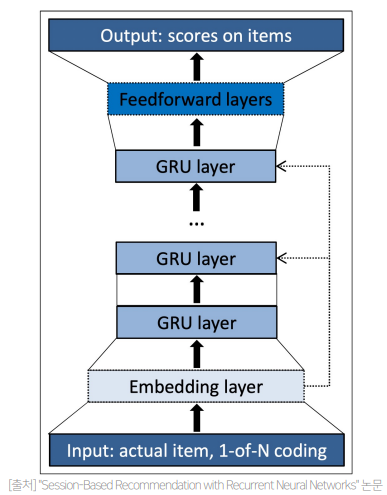

입력
- one-hot encoding된 session
- (참고) 임베딩 레이어를 사용하지 않았을 때의 성능이 더 높다.
<br></br>

GRU 레이어
- 시퀀스 상 모든 아이템들에 대한 맥락적 관게를 학습한다.
<br></br>

출력
- 다음에 골라질 아이템에 대한 선호도 스코어를 출력한다.

**학습 : Session Parallel Mini batches**

대부분의 세션은 매우 짧지만, 길이가 긴 것도 존재한다.

길이가 짧은 세션들이 단독 사용되어 idel 하지 않도록, 세션을 병렬적으로 구성하여 미니 배치 학습을 진행한다.
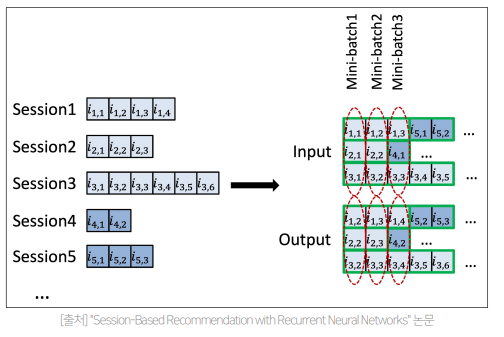

**학습 : Sampling on the output**

1. 현실에서는 아이템의 수가 많기 때문에 모든 후보 아이템의 확률을 계산하기 어렵다.
- 따라서, 아이템을 negative sampling하여 subset만으로 loss를 계산한다.
<br></br>

2. 사용자가 상호작용을 하지 않은 아이템은 존재 자체를 몰랐거나 관심이 없는 것이다.
- 만약, 아이템의 인기가 높은데도 상호작용이 없었다면 사용자가 관심이 없는 아이템이라고 가정한다.
- => 인기에 기반한 Negative Sampling 제시한다.
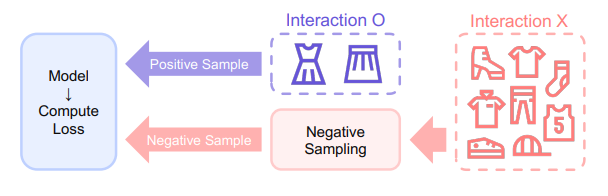

**결과 및 요약**
- REC15와 VIDEO 데이터셋에서 가장 좋은 성능을 보인 item-KNN 모델 대비 약 20% 높은 추천 성능을 보였다.
- GRU레이어 hidden unit이 클 때 더 좋은 추천 성능을 보였다(Cross Entropy Loss만 예외).
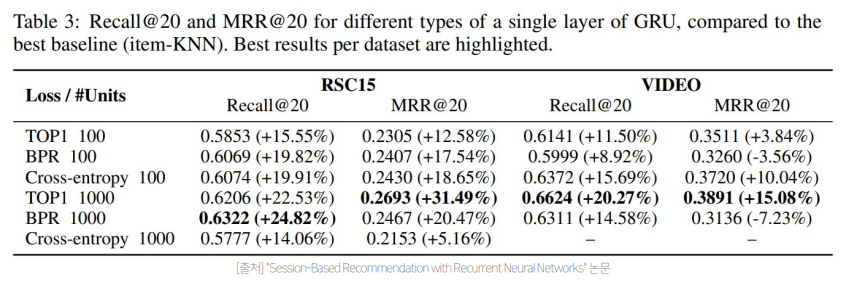